In [1]:
#Name:Yen Pham
#CSCE 5290  Project

import pandas as pd
import matplotlib.pyplot as plt

# Read files 
df = pd.read_csv ('D:\CSCE5290-Natural Language Processing\Project\original_dataset/Reddit_covid_threads.csv')
df = df.drop_duplicates()
reddit_count = len(df.index)

df1 = pd.read_csv ('D:\CSCE5290-Natural Language Processing\Project\original_dataset/Youtube_covid_comments.csv')
df1 = df1.drop_duplicates()
youtube_count = len(df1.index)

df2 = pd.read_csv ('D:\CSCE5290-Natural Language Processing\Project\original_dataset/Twitter_covid_tweets.csv')
df2 = df2.drop_duplicates()
twitter_count = len(df2.index)

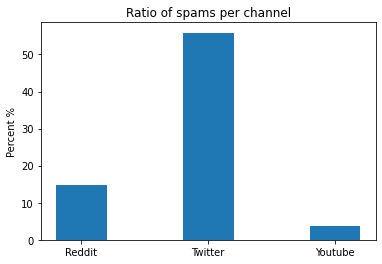

In [2]:
# Get perc of spams and drop spams

df = df.drop_duplicates(subset=['Text'])
reddit_spam_perc = (reddit_count - len(df.index))*100/reddit_count

df1 = df1.drop_duplicates(subset=['Comment'])
youtube_spam_perc = (youtube_count - len(df1.index))*100/youtube_count

df2 = df2.drop_duplicates(subset=['Text'])
twitter_spam_perc = (twitter_count - len(df2.index))*100/twitter_count

# creating the dataset
data = {'Reddit':reddit_spam_perc, 'Twitter':twitter_spam_perc , 'Youtube':youtube_spam_perc}
keys = list(data.keys())
values = list(data.values())
  
# fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(keys, values, width = 0.4)
 
plt.ylabel("Percent %")
plt.title("Ratio of spams per channel")
plt.show()
# print(df)

In [3]:
# Clean blank columns (comments were removed due to user's choices)

df = df[df['Text'].notna()]
df = df[df['User_ID'].notna()]
# print(df)

df1 = df1[df1['Comment'].notna()]
df1 = df1[df1['User_ID'].notna()]
# print(df1)

df2 = df2[df2['Text'].notna()]
df2 = df2[df2['User_ID'].notna()]
print(df2)

                           Created_at       User_ID  \
0      Wed Oct 20 16:19:28 +0000 2021  1.384310e+18   
1      Wed Oct 20 16:19:28 +0000 2021  1.069250e+18   
2      Wed Oct 20 16:19:32 +0000 2021  2.511069e+08   
3      Wed Oct 20 16:19:33 +0000 2021  1.233376e+08   
4      Wed Oct 20 16:19:33 +0000 2021  5.459926e+08   
...                               ...           ...   
76768  Sat Nov 27 06:42:00 +0000 2021  1.454399e+18   
76769  Sat Nov 27 06:42:03 +0000 2021  1.918924e+09   
76771  Sat Nov 27 06:42:25 +0000 2021  1.928808e+09   
76777  Sat Nov 27 06:42:29 +0000 2021  1.113906e+18   
76780  Sat Nov 27 06:42:39 +0000 2021  1.113906e+18   

                                                    Text  
0      Pfizer acknowledged mix&amp;match approach pio...  
1      Tories looking for someone to blame for the fo...  
2      Aww man, UK Health sec Sajid Javid's on TV giv...  
3      The Saj telling how advanced U.K. is at all th...  
4      This man has just said they have secu

In [4]:
import spacy
import langdetect
import langid
import re
import numpy as np

# Clean up texts by removing hyperlinks, emails, uneccesary punctuations and multi spaces
def clean_text(text):
    text = re.sub(r'(https)?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\S*@\S*\s?', '', text)
    text = re.sub(r'(#+[a-zA-Z0-9(_)]{1,})', ' ', text)
    text = re.sub(r'(&+[a-zA-Z0-9(_)]{1,})', ' ', text)
    text = re.sub(r'<br', ' ', text)
    text = re.sub(r'\n', '. ', text)
    text = re.sub(r'[^A-Za-z0-9 ,.:?!()\']+', ' ', text)
    text = re.sub(r'(\.)+', '. ', text)
    text = re.sub(r'\s+', ' ', text)
    return text

# Get texts
reddit_texts = df['Text'].to_list()
youtube_texts = df1['Comment'].to_list()
twitter_texts = df2['Text'].to_list()

old_reddit_count = len(df.index)
old_twitter_count = len(df2.index)
old_youtube_count = len(df1.index)
print("Original count of Reddit threads: " + str(old_reddit_count))
print("Original count of Twitter tweets: " + str(old_twitter_count))
print("Original count of Youtube comments: " + str(old_youtube_count))

#detect language for twitter
for i in range(len(twitter_texts)):
    text = clean_text(twitter_texts[i])
    try:
        result = langdetect.detect_langs(text)
        result = str(result[0])[:2]
    except:
        result = 'unknown'
    if result != 'en':
        text = np.NaN
    twitter_texts[i] = text
df2['Text'] = twitter_texts

#detet language for reddit
for i in range(len(reddit_texts)):
    text = clean_text(reddit_texts[i])
    try:
        result = langdetect.detect_langs(text)
        result = str(result[0])[:2]
    except:
        result = 'unknown'
    if result != 'en':
        text = np.NaN
    reddit_texts[i] = text
df['Text'] = reddit_texts

#detect ;anguage for youtube
for i in range(len(youtube_texts)):
    text = clean_text(youtube_texts[i])
    try:
        result = langdetect.detect_langs(text)
        result = str(result[0])[:2]
    except:
        result = 'unknown'
    if result != 'en':
        text = np.NaN
    youtube_texts[i] = text
df1['Comment'] = youtube_texts


Original count of Reddit threads: 89005
Original count of Twitter tweets: 33891
Original count of Youtube comments: 58755


Count of Reddit non-english threads: 4051
Count of Twitter non-english tweets: 4538
Count of Youtube non-english comments: 19207


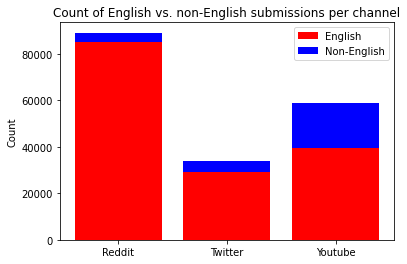

In [5]:
df = df[df['Text'].notna()]
df = df.drop_duplicates(subset=['Text'])
df1 = df1[df1['Comment'].notna()]
df1 = df1.drop_duplicates(subset=['Comment'])
df2 = df2[df2['Text'].notna()]
df2 = df2.drop_duplicates(subset=['Text'])
# print(df2)

# Get count of non-English submissions
non_en_reddit_count = old_reddit_count- len(df.index)
non_en_twitter_count = old_twitter_count - len(df2.index)
non_en_youtube_count = old_youtube_count - len(df1.index)
print("Count of Reddit non-english threads: " + str(non_en_reddit_count))
print("Count of Twitter non-english tweets: " + str(non_en_twitter_count))
print("Count of Youtube non-english comments: " + str(non_en_youtube_count))

# Get count of English submissions
en_reddit_count = len(df.index)
en_twitter_count = len(df2.index)
en_youtube_count = len(df1.index)
x = ['Reddit', 'Twitter', 'Youtube']
y1 = [en_reddit_count, en_twitter_count, en_youtube_count]
y2 = [non_en_reddit_count, non_en_twitter_count, non_en_youtube_count]

# plot bars in stack manner
plt.bar(x, y1, color = 'red')
plt.bar(x, y2, bottom=y1, color='blue')
plt.ylabel("Count")
plt.title("Count of English vs. non-English submissions per channel")
plt.legend(["English", "Non-English"])
plt.show()

In [6]:
from collections import Counter

twitter_user_counter = Counter(df2['User_ID'])
# print(twitter_user_count)

reddit_user_counter = Counter(df['User_ID'])
# print(reddit_user_count)

youtube_user_counter = Counter(df1['User_ID'])
# print(youtube_user_count)

# Count number of Twitter users based on their activity (number of submissions) over the time period
twitter_over_10 = 0
twitter_3_10 = 0
twitter_under_3 = 0
for value in twitter_user_counter.values():
    if value >= 10:
        twitter_over_10 += 1
    elif value < 10 and value >=3:
        twitter_3_10 += 1
    else:
        twitter_under_3 += 1

# Get ratio of twitter users over total tweets
twitter_over_10 = twitter_over_10*100/len(df2.index) 
twitter_3_10 = twitter_3_10*100/len(df2.index)
twitter_under_3 = twitter_under_3*100/len(df2.index)

# Count number of Reddit users based on their activity (number of submissions) over the time period
reddit_over_10 = 0
reddit_3_10 = 0
reddit_under_3 = 0
for value in reddit_user_counter.values():
    if value >= 10:
        reddit_over_10 += 1
    elif value < 10 and value >=3:
        reddit_3_10 += 1
    else:
        reddit_under_3 += 1
        
# Get ratio of reddit users over total reddit submissions
reddit_over_10 = reddit_over_10*100/len(df.index)
reddit_3_10 = reddit_3_10*100/len(df.index)
reddit_under_3 = reddit_under_3*100/len(df.index)

# Count number of Youtube users based on their activity (number of submissions) over the time period
youtube_over_10 = 0
youtube_3_10 = 0
youtube_under_3 = 0
for value in youtube_user_counter.values():
    if value >= 10:
        youtube_over_10 += 1
    elif value < 10 and value >=3:
        youtube_3_10 += 1
    else:
        youtube_under_3 += 1

# Get ratio of youtube users over total reddit submissions
youtube_over_10 = youtube_over_10*100/len(df1.index)
youtube_3_10 = youtube_3_10*100/len(df1.index)
youtube_under_3 = youtube_under_3*100/len(df1.index)


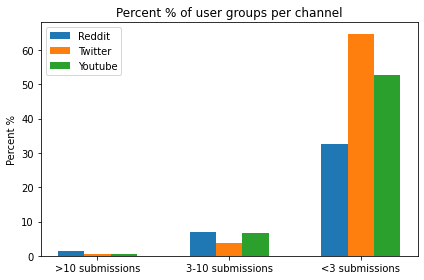

In [7]:
# Create bar plot of how active users were over 3 channels
labels = ['>10 submissions', '3-10 submissions', '<3 submissions']
reddit_info = [reddit_over_10, reddit_3_10, reddit_under_3]
twitter_info = [twitter_over_10, twitter_3_10, twitter_under_3]
youtube_info = [youtube_over_10, youtube_3_10, youtube_under_3]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - 0.2, reddit_info, width, label='Reddit')
rects2 = ax.bar(x, twitter_info, width, label='Twitter')
rects2 = ax.bar(x + 0.2, youtube_info, width, label='Youtube')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percent %')
ax.set_title('Percent % of user groups per channel')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

In [11]:
from datetime import datetime

# Proccess time stamp from Reddit dataset
df['Created_at'] = [datetime.utcfromtimestamp(int(timestamp)) for timestamp in df['Time_Stamp']]
del df['Time_Stamp']
df = df[['Created_at', 'User_ID', 'Text']]
print(df)


                Created_at              User_ID  \
0      2020-02-19 01:36:55           TeRiYaki32   
1      2020-02-19 01:37:13           TeRiYaki32   
2      2020-02-19 02:10:57        Prayers4Wuhan   
5      2020-02-19 08:29:12                loot6   
6      2020-02-19 10:16:32           Sefton2020   
...                    ...                  ...   
104539 2021-11-25 00:42:00  throwaway3772917422   
104540 2021-11-25 02:31:40          evilplushie   
104541 2021-11-25 13:12:06        Ivehadlettuce   
104542 2021-11-25 16:40:05      MembraneAnomaly   
104543 2021-11-25 19:14:47          SpecialPea8   

                                                     Text  
0       Feb 19, 2020, updated periodically. Unfortunat...  
1       Moderators, we should sticky this to the front...  
2                            Welcome to Freedom of Speech  
5       SO2 is high because they have to burn medical ...  
6       They ll find a way of silencing this sub too s...  
...                        

In [12]:
from dateutil import parser
import time

# Process timestamp from Youtube dataset
df1['Created_at'] = [datetime(*time.strptime(str(timestamp), "%Y-%m-%dT%H:%M:%SZ")[:6]) for timestamp in df1['Created_at']]
del df1['Video_ID']
df1 = df1.rename({'Comment': 'Text'}, axis='columns')
print(df1)

               Created_at         User_ID  \
0     2021-10-22 00:11:46    Oliver Green   
1     2021-10-22 00:58:55    Richard Wick   
2     2021-10-22 00:57:57       Susan Sus   
3     2021-10-22 00:57:07   Margaret Sera   
4     2021-10-22 00:55:15   Alice Kathryn   
...                   ...             ...   
60955 2021-11-24 17:08:52         dee dee   
60958 2021-11-24 16:32:23               _   
60959 2021-11-24 16:12:31   Spencer Brown   
60960 2021-11-24 16:05:27  Devon McKnight   
60961 2021-11-24 18:47:07      Rebecca B.   

                                                    Text  
0      Modern man is not the man who goes off to disc...  
1      I am very glad I stumbled on this today writin...  
2      The economic hardship , recession , unemployme...  
3      If I had not experienced this myself I would h...  
4      I ve seen different recommendations about this...  
...                                                  ...  
60955  My red corpsuckels are in mass confusio

In [13]:
# Process time stamp from Twitter dataset
df2['Created_at'] = [datetime.strftime(datetime.strptime(str(dtime),'%a %b %d %H:%M:%S +0000 %Y'), '%Y-%m-%d %H:%M:%S') for dtime in df2['Created_at']]
print(df2)

                Created_at       User_ID  \
0      2021-10-20 16:19:28  1.384310e+18   
1      2021-10-20 16:19:28  1.069250e+18   
2      2021-10-20 16:19:32  2.511069e+08   
3      2021-10-20 16:19:33  1.233376e+08   
4      2021-10-20 16:19:33  5.459926e+08   
...                    ...           ...   
76768  2021-11-27 06:42:00  1.454399e+18   
76769  2021-11-27 06:42:03  1.918924e+09   
76771  2021-11-27 06:42:25  1.928808e+09   
76777  2021-11-27 06:42:29  1.113906e+18   
76780  2021-11-27 06:42:39  1.113906e+18   

                                                    Text  
0      Pfizer acknowledged mix match approach pioneer...  
1      Tories looking for someone to blame for the fo...  
2      Aww man, UK Health sec Sajid Javid's on TV giv...  
3      The Saj telling how advanced U. K. is at all t...  
4      This man has just said they have secured deals...  
...                                                  ...  
76768  All of us have secrets in our lives. . But did...  

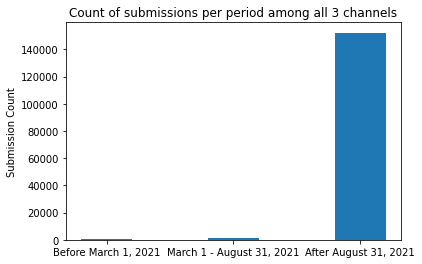

In [14]:
df_summary = pd.concat([df,df1,df2])

# Create bar plot to summarize the submissions over 3 periods in the dataset
before_March21_count = 0
March21_August21_count = 0
after_August21_count = 0
for time in df_summary['Created_at']:
    time = pd.Timestamp(time, tz=None)
    if time.to_pydatetime() < datetime(2021, 3, 1):
        before_March21_count += 1
    elif time.to_pydatetime() >= datetime(2021, 3, 1) and time.to_pydatetime() < datetime(2021, 8, 31):
        March21_August21_count += 1
    else:
        after_August21_count += 1
# print(before_March21_count)
# print(March21_August21_count)
# print(after_August21_count)

# creating the dataset
data = {'Before March 1, 2021': before_March21_count, 'March 1 - August 31, 2021': March21_August21_count, 'After August 31, 2021':after_August21_count}
keys = list(data.keys())
values = list(data.values())
  
# fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(keys, values, width = 0.4)
 
plt.ylabel("Submission Count")
plt.title("Count of submissions per period among all 3 channels")
plt.show()
# print(df)

In [15]:
# Save cleaned data to cleaned_data folder
df.to_csv(r'D:\CSCE5290-Natural Language Processing\Project\cleaned_data/Reddit_covid_threads.csv', index = False)
df1.to_csv(r'D:\CSCE5290-Natural Language Processing\Project\cleaned_data/Youtube_covid_comments.csv', index = False)
df2.to_csv(r'D:\CSCE5290-Natural Language Processing\Project\cleaned_data/Twitter_covid_tweets.csv', index = False)